In [2]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
# Using the Kaggle CLI to download a dataset named 'dogs-vs-cats' from Kaggle
# The dataset is specified with the '-d' flag, followed by the Kaggle dataset identifier 'salader/dogs-vs-cats'
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [63]:
import zipfile
# Creating a ZipFile object to open and extract the contents of 'dogs-vs-cats.zip'
# Extracting all the contents of 'dogs-vs-cats.zip' to the '/content' directory
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [64]:
# Importing the necessary libraries from TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [65]:
train_ds = keras.utils.image_dataset_from_directory(
    directory= ('/content/train'),
    labels='inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size= (256,256)
)

Found 20000 files belonging to 2 classes.


In [66]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 5000 files belonging to 2 classes.


In [67]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [68]:

from keras.models import Sequential
from keras.layers import Conv2D

# Create a Sequential model
model = Sequential()

# Add a Conv2D layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [69]:
 #Add a Conv2D layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [70]:
#Add a Conv2D layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [71]:
# Adding a Flatten layer to transform the 2D output to 1D
model.add(Flatten())

# Adding a Dense (fully connected) layer with ReLU activation and 128 units
# Adding a Dropout layer with a dropout rate of 0.1 to prevent overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

# Adding a final Dense layer with a sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))


In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [73]:
# Compiling the model with the Adam optimizer, binary cross-entropy loss function,
# and accuracy metric for binary classification

model.compile(optimizer='adam',loss='binary_crossentropy', metrics= ['accuracy'])

In [74]:
# Training the model using the `train_ds` dataset for 10 epochs and validating it on the `validation_ds` dataset

epochs_history_chack = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 107ms/step - loss: 1.3272 - accuracy: 0.6104 - val_loss: 0.6010 - val_accuracy: 0.6734
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5413 - accuracy: 0.7270 - val_loss: 0.5416 - val_accuracy: 0.7236
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4652 - accuracy: 0.7800 - val_loss: 0.4532 - val_accuracy: 0.7870
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4173 - accuracy: 0.8086 - val_loss: 0.4159 - val_accuracy: 0.8144
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3565 - accuracy: 0.8428 - val_loss: 0.4720 - val_accuracy: 0.7732
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2988 - accuracy: 0.8707 - val_loss: 0.4614 - val_accuracy: 0.8072
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2207 - accuracy: 0.9102 - val_loss: 0.5028 - val_ac

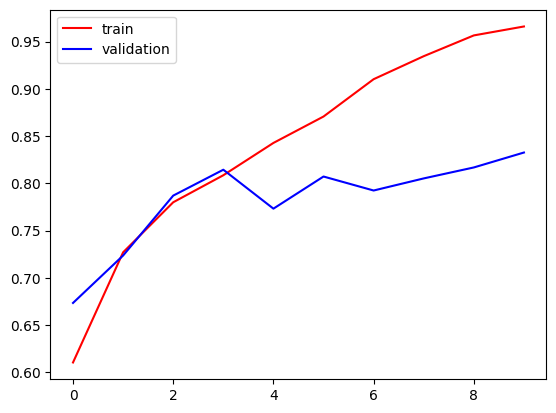

In [75]:

import matplotlib.pyplot as plt
plt.plot(epochs_history_chack.history['accuracy'],color='red',label='train')
plt.plot(epochs_history_chack.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

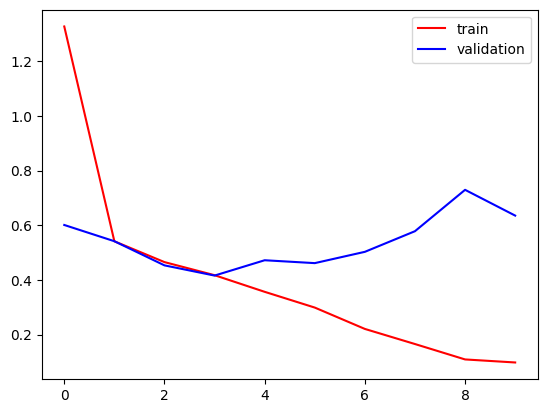

In [76]:
plt.plot(epochs_history_chack.history['loss'],color='red',label='train')
plt.plot(epochs_history_chack.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [77]:
import cv2

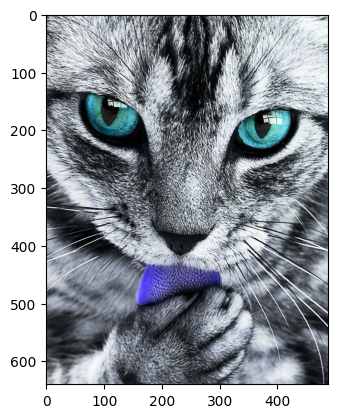

In [95]:
test_img = cv2.imread('/content/cat.jpg')
plt.imshow(test_img)

In [96]:
test_img.shape

(640, 489, 3)

In [97]:
test_img = cv2.resize(test_img,(256,256))

In [99]:
test_input = test_img.reshape((1,256,256,3))

In [100]:
model.predict(test_input)

1/1 [==============================] - 0s 44ms/step


array([[1.]], dtype=float32)